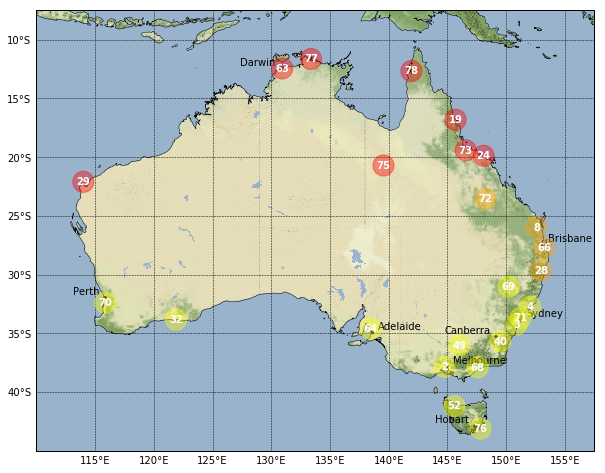

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker

import cartopy.crs as ccrs
from cartopy.io.img_tiles import Stamen
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

radar_info = [('76', -43.1126, 147.8052,'yellow'),
              ('52', -41.1791, 145.58, 'yellow'),
              ('2', -37.855, 144.755, 'yellow'),
              ('64',-34.617, 138.4689, 'yellow'),
              ('68',-37.8876, 147.5755,'yellow'),
              ('3', -34.263, 150.875,'yellow'),
              ('4', -32.7298, 152.0254,'yellow'),
              ('71', -33.7008, 151.2095,'yellow'),
              ('69', -31.024, 150.192, 'yellow'),
              ('40', -35.661, 149.512, 'yellow'),
              ('49', -36.0296, 146.0228, 'yellow'),
              ('70', -32.392, 115.867, 'yellow'),
              ('32',-33.8302, 121.8918, 'yellow'),
              ('28', -29.621, 152.963,'orange'),
              ('66', -27.7178, 153.24,'orange'),
              ('8', -25.957, 152.577,'orange'),
              ('72', -23.5496, 148.2392,'orange'),
              ('19',-16.817, 145.683, 'r'),
              ('24',-19.8857, 148.0757, 'r'),
              ('29',-22.1032, 113.9997, 'r'),
              ('63',-12.4559, 130.9266, 'r'),
              ('73',-19.4199, 146.5509, 'r'),
              ('75',-20.7112, 139.5553, 'r'),
              ('77',-11.6485, 133.38, 'r'),
              ('78',-12.6664, 141.9246, 'r')]
             

city_info = [('Melbourne', -37.81, 144.96,'left'),
            ('Sydney', -33.86, 151.21,'left'),
            ('Brisbane',-27.47, 153.03,'left'),
            ('Adelaide',-34.93, 138.60,'left'),
            ('Perth',-31.95, 115.86,'right'),
            ('Hobart',-42.88, 147.32,'right'),
            ('Darwin',-12.43, 130.84,'right'),
            ('Canberra',-35.29, 149.13,'right')]

def main():
    tiler = Stamen('terrain-background')
    #mercator = tiler.crs
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([110, 157.5, -45, -7.5], crs=ccrs.PlateCarree())
    #add features
    ax.add_image(tiler, 6)
    ax.coastlines('10m', linewidth=0.5)
    #build gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='k', linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.ylocator = mticker.FixedLocator([-45,-40,-35,-30,-25,-20,-15,-10,-5])
    gl.xlocator = mticker.FixedLocator([110,115,120,125,130,135,140,145,150,155,160])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
        
    #add annotations
    for item in city_info:
        ax.add_patch(mpatches.Circle(xy=[item[2],item[1]], radius=0.1, color='k', alpha=1.0, transform=ccrs.PlateCarree(), zorder=1))
        if item[3] == 'left':
            plt.text(item[2]+0.5, item[1]+0.5, item[0], horizontalalignment='left', verticalalignment='center', transform=ccrs.PlateCarree(), zorder=1)
        else:
            plt.text(item[2]-0.5, item[1]+0.5, item[0], horizontalalignment='right', verticalalignment='center', transform=ccrs.PlateCarree(), zorder=1)
            
    #add annotations
    for item in radar_info:
        ax.add_patch(mpatches.Circle(xy=[item[2],item[1]], radius=0.9, color=item[3], alpha=0.4, transform=ccrs.PlateCarree(), zorder=2))
        plt.text(item[2], item[1], item[0], horizontalalignment='center', verticalalignment='center', transform=ccrs.PlateCarree(), weight="bold", color='w', zorder=3)

    plt.savefig('pst_map.png', dpi=150)
    plt.show()


if __name__ == '__main__':
    main()
